In [4]:
!pip3 install matplotlib
!pip3 install numpy
!pip3 install seaborn

     |################################| 292 kB 1.4 MB/s            
     |################################| 9.5 MB 92 kB/s             
     |################################| 25.9 MB 16.9 MB/s            
     |################################| 503 kB 19.1 MB/s            


# Import Libaries, Packages and Declare Spark Session

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
from pyspark.sql import SparkSession
spark = SparkSession\
        .builder.appName("Analyze Customer Prosensity")\
        .master("spark://hadoop-spark-master:7077")\
        .config("spark.executor.memory", "1G")\
        .getOrCreate()

/usr/local/lib/python3.6/dist-packages/pyspark/context.py:238: FutureWarning: Python 3.6 support is deprecated in Spark 3.2.
  FutureWarning


# Data Preprocessing

In [8]:
# read data
rdd = spark.read.csv("hdfs://hadoop-spark-master:9000/training.csv", header=True, inferSchema=True)

rdd.printSchema()

root
 |-- UserID: string (nullable = true)
 |-- basket_icon_click: integer (nullable = true)
 |-- basket_add_list: integer (nullable = true)
 |-- basket_add_detail: integer (nullable = true)
 |-- sort_by: integer (nullable = true)
 |-- image_picker: integer (nullable = true)
 |-- account_page_click: integer (nullable = true)
 |-- promo_banner_click: integer (nullable = true)
 |-- detail_wishlist_add: integer (nullable = true)
 |-- list_size_dropdown: integer (nullable = true)
 |-- closed_minibasket_click: integer (nullable = true)
 |-- checked_delivery_detail: integer (nullable = true)
 |-- checked_returns_detail: integer (nullable = true)
 |-- sign_in: integer (nullable = true)
 |-- saw_checkout: integer (nullable = true)
 |-- saw_sizecharts: integer (nullable = true)
 |-- saw_delivery: integer (nullable = true)
 |-- saw_account_upgrade: integer (nullable = true)
 |-- saw_homepage: integer (nullable = true)
 |-- device_mobile: integer (nullable = true)
 |-- device_computer: integer (n

In [9]:
# chuyển thành dataframe
df = rdd.toPandas()

In [ ]:
# copy data ra một biến khác để đảm bảo an toàn cho dữ liệu
df_cp = df.copy()

# EDA - Exploratory Data Analysis
Những thông tin cần biết từ dữ liệu:

1. Dữ liệu bao gồm bao nhiêu hàng, cột?
2. Phân bố dữ liệu của từng feature như thế nào?
3. Tên của các cột đã dể hiểu hay chưa?
4. Phân loại các biến continous và categorical
5. Dữ liệu có chứa NaN hay không?
6. Kiểm tra Outliners?

In [11]:
# kiểm tra 5 dòng đầu
df_cp.head(5)

UserID  basket_icon_click  basket_add_list  \
0  a720-6b732349-a720-4862-bd21-644732                  0                0   
1  a0c0-6b73247c-a0c0-4bd9-8baa-797356                  0                0   
2  86a8-6b735c67-86a8-407b-ba24-333055                  0                0   
3  6a3d-6b736346-6a3d-4085-934b-396834                  0                0   
4  b74a-6b737717-b74a-45c3-8c6a-421140                  0                1   

   basket_add_detail  sort_by  image_picker  account_page_click  \
0                  0        0             0                   0   
1                  0        0             0                   0   
2                  0        0             0                   0   
3                  0        0             0                   0   
4                  0        1             0                   0   

   promo_banner_click  detail_wishlist_add  list_size_dropdown  ...  \
0                   0                    0                   0  ...   
1                   0                    0                   0  ...   
2                   0                    0                   0  ...   
3                   0                    0                   0  ...   
4                   0                    0                   1  ...   

   saw_sizecharts  saw_delivery  saw_account_upgrade  saw_homepage  \
0               0             0                    0             0   
1               0             0                    0             0   
2               0             0                    0             0   
3               0             0                    0             0   
4               0             0                    0             1   

   device_mobile  device_computer  device_tablet  returning_user  loc_uk  \
0              1                0              0               0       1   
1              1                0              0               0       1   
2              1                0              0               1       1   
3              1                0              0               1       1   
4              0                0              1               0       1   

   ordered  
0        0  
1        0  
2        0  
3        0  
4        1  

[5 rows x 25 columns]

In [12]:
# check info
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int32 
 2   basket_add_list          455401 non-null  int32 
 3   basket_add_detail        455401 non-null  int32 
 4   sort_by                  455401 non-null  int32 
 5   image_picker             455401 non-null  int32 
 6   account_page_click       455401 non-null  int32 
 7   promo_banner_click       455401 non-null  int32 
 8   detail_wishlist_add      455401 non-null  int32 
 9   list_size_dropdown       455401 non-null  int32 
 10  closed_minibasket_click  455401 non-null  int32 
 11  checked_delivery_detail  455401 non-null  int32 
 12  checked_returns_detail   455401 non-null  int32 
 13  sign_in                  455401 non-null  int32 
 14  saw_checkout        

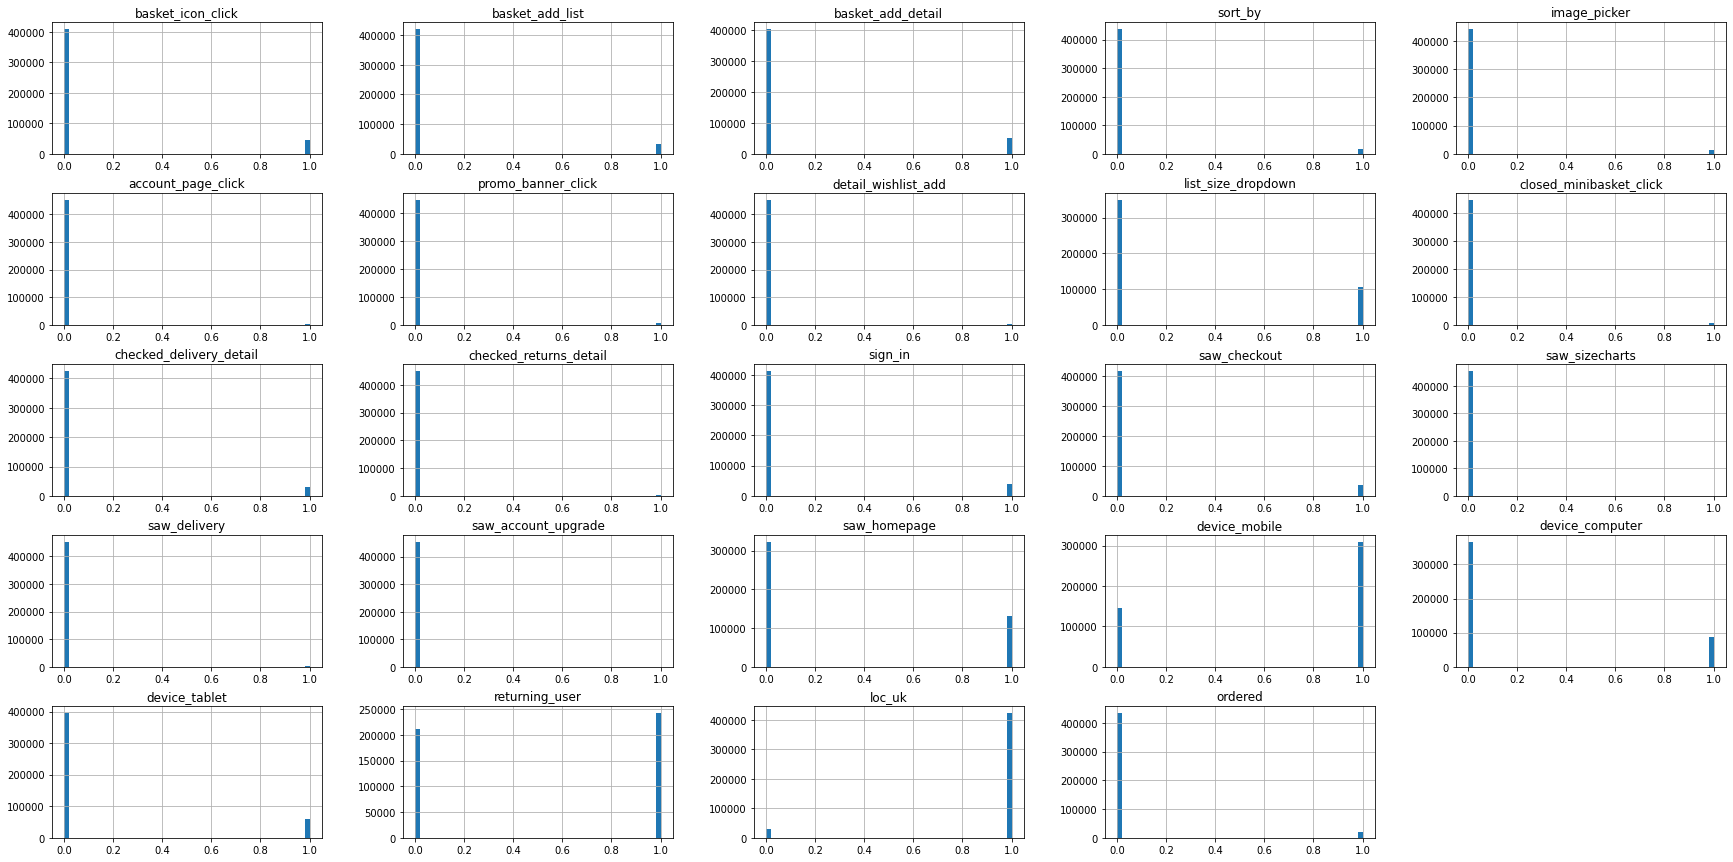

In [14]:
# check phân bố dữ liệu
df_cp.hist(bins=50,figsize=(30, 15))
plt.show()

## Kiểm tra giá trị NaN của các features

In [15]:
# check dữ liệu NaN
missing_data = df_cp.isna().sum().reset_index()
missing_data.columns = ["features", "total_missing"]

In [16]:
missing_data

features  total_missing
0                    UserID              0
1         basket_icon_click              0
2           basket_add_list              0
3         basket_add_detail              0
4                   sort_by              0
5              image_picker              0
6        account_page_click              0
7        promo_banner_click              0
8       detail_wishlist_add              0
9        list_size_dropdown              0
10  closed_minibasket_click              0
11  checked_delivery_detail              0
12   checked_returns_detail              0
13                  sign_in              0
14             saw_checkout              0
15           saw_sizecharts              0
16             saw_delivery              0
17      saw_account_upgrade              0
18             saw_homepage              0
19            device_mobile              0
20          device_computer              0
21            device_tablet              0
22           returning_user              0
23                   loc_uk              0
24                  ordered              0

**Kết luận**

**Dữ liệu bao gồm:** 455401 recors, 24 columns

**Tên của các features:** Dễ hiểu, không cần thực hiện thay đổi

**Dữ liệu của các features:** Không cần thực hiện thay đổi vì mọi features đều ở dạng binary categorical

**Label:** Ordered

**NaN data:** Các features không chứa NaN data

**Outliers:** Các features không chứa outliers